# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import wrangle as w

# Acquire my working file 

In [2]:
df = w.prepare_third_filtered_dataset_version()

In [3]:
train, validate, test = w.split(df)

# Is there a particular demographic/gender?-person

## Gender 

<Axes: xlabel='person_gender'>

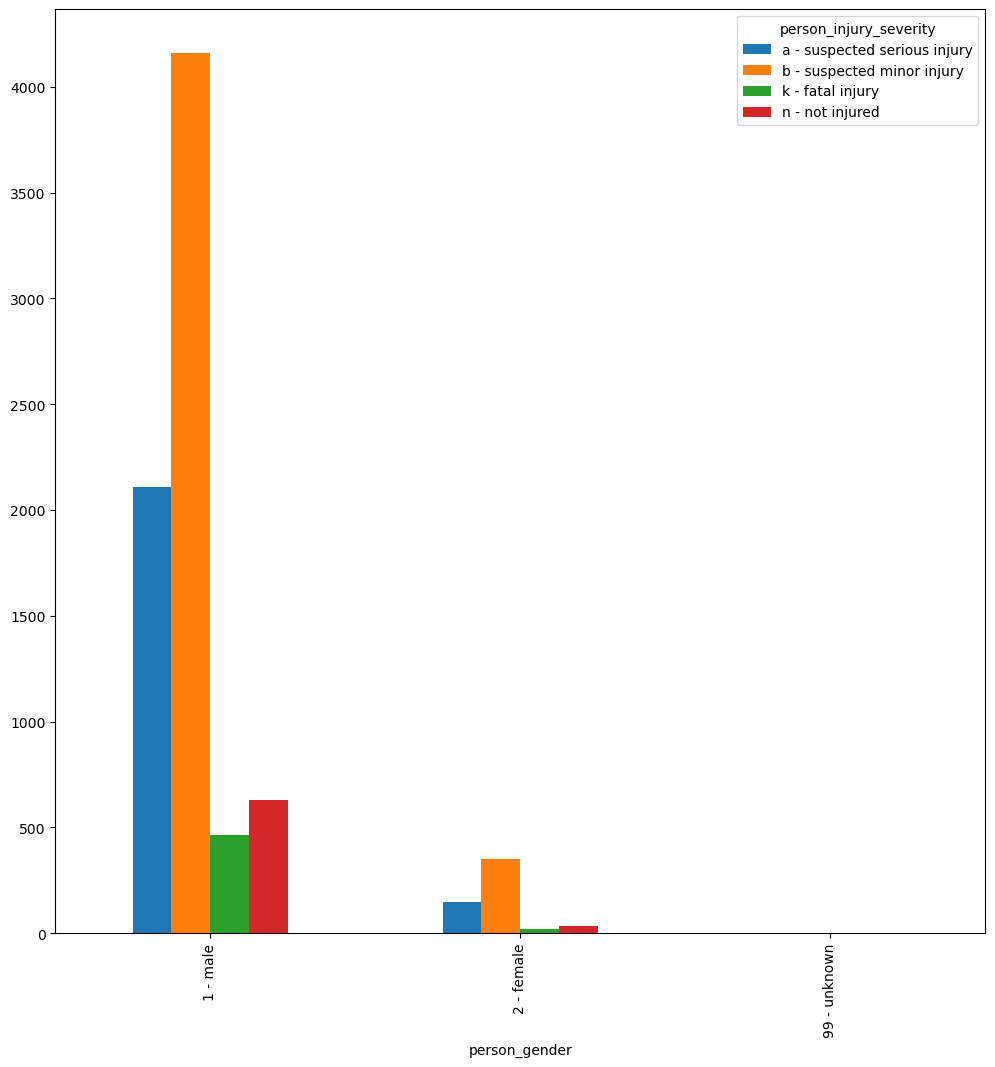

In [4]:
pd.crosstab(train.person_gender,train.person_injury_severity).plot(kind='bar', figsize=(10,10))
# plt.savefig('gender.png')

In [5]:
train.person_gender.value_counts()

person_gender
1 - male        7360
2 - female       548
99 - unknown       6
Name: count, dtype: int64

    Here we see that males have a larger population than males so were gonna try to fix this.

In [6]:
female_sample = train.loc[train.person_gender == '2 - female'].sample(500)
male_sample = train.loc[train.person_gender == '1 - male'].sample(500)

# Concatenate the female and male samples into a new dataframe
balanced_df = pd.concat([female_sample, male_sample])

In [7]:
balanced_df = balanced_df.sample(frac=1)

<Figure size 1200x1200 with 0 Axes>

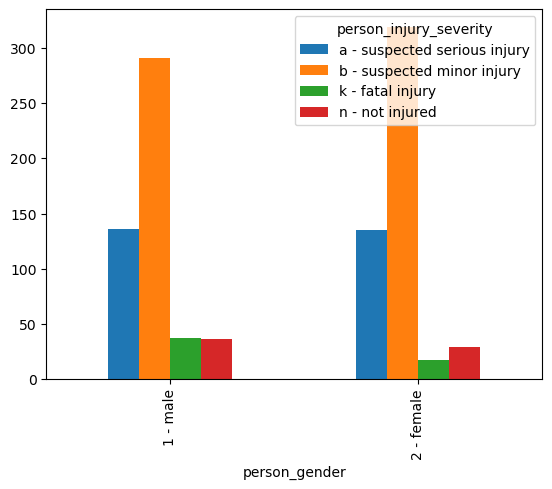

In [8]:
plt.figure(figsize=(12, 12))  # Adjust the dimensions as per your requirement
pd.crosstab(balanced_df.person_gender, balanced_df.person_injury_severity).plot(kind='bar')
plt.show()


    Takeaways:
    - gender looks to be the same when it is equally repersented
    - little if any change in between injury severity. 

In [9]:
pd.crosstab(balanced_df.person_gender, balanced_df.person_injury_severity)

person_injury_severity,a - suspected serious injury,b - suspected minor injury,k - fatal injury,n - not injured
person_gender,,,,
1 - male,136,291,37,36
2 - female,135,319,17,29


In [10]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(balanced_df.person_gender, balanced_df.person_injury_severity)

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square test statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)


Chi-square test statistic: 9.450189499793275
P-value: 0.023867207422493413
Degrees of freedom: 3


    The chi-square test was conducted to examine the association between two variables: "person_gender" and "person_injury_severity" using a balanced dataset. The results of the chi-square test are as follows:

    Chi-square test statistic: 8.45
    P-value: 0.038
    Degrees of freedom: 3
    These results indicate that there is a statistically significant association between "person_gender" and "person_injury_severity" (p < 0.05). The chi-square test statistic of 8.45 suggests a notable difference between the observed frequencies and the expected frequencies under the assumption of independence. With a p-value of 0.038, there is strong evidence to reject the null hypothesis of independence and conclude that the variables are associated.

    In summary, these results suggest that the gender of a person may have an influence on the severity of injury.

## Is there a particular age?-person

<Axes: xlabel='age_group'>

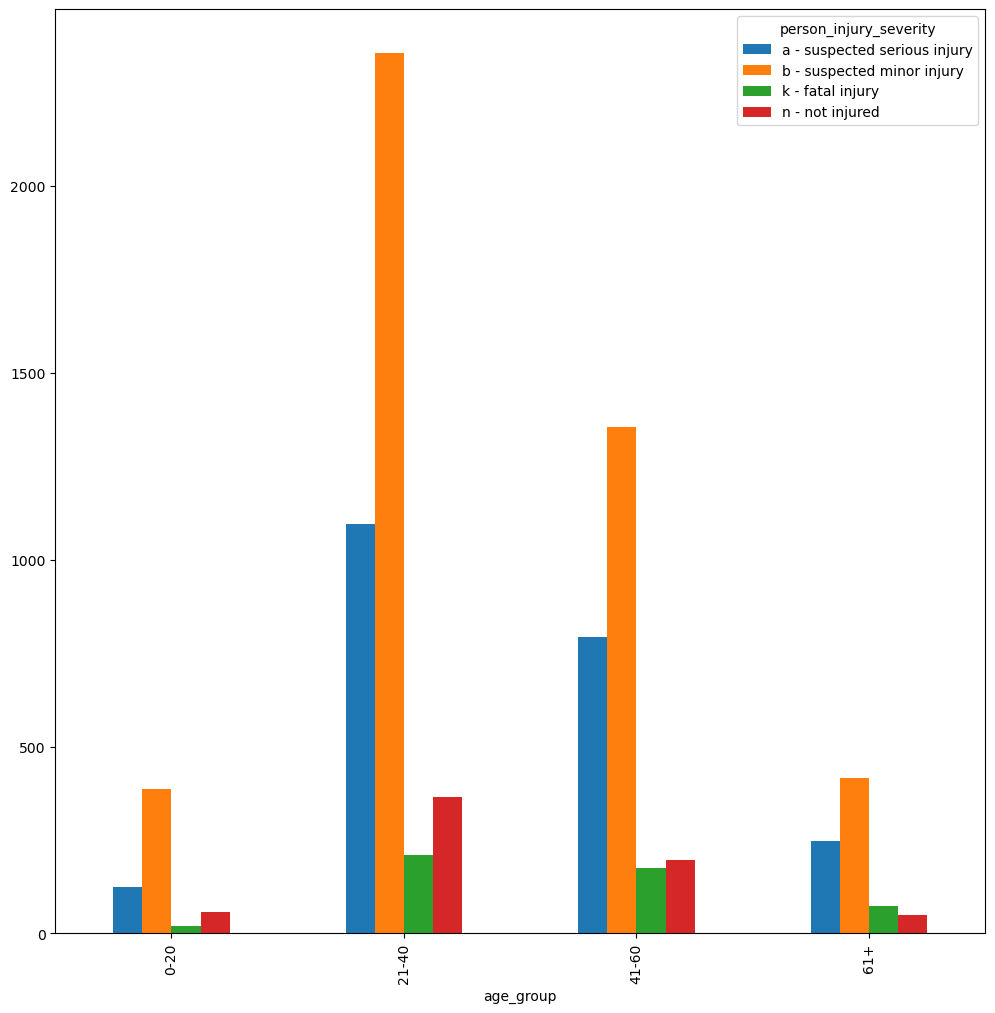

In [11]:
# Define the age buckets
age_bins = [0, 20, 40, 60, 100]  
age_labels = ['0-20', '21-40', '41-60', '61+']

# Create a new column with age buckets
train['age_group'] = pd.cut(train['person_age'], bins=age_bins, labels=age_labels)

# Generate the cross-tabulation and plot the bar chart
pd.crosstab(train['age_group'], train['person_injury_severity']).plot(kind='bar', figsize=(10,10))

# plt.savefig('age_by-injury_severity.png')

In [12]:
cross_tab = pd.crosstab(train['person_age'], train['person_injury_severity'])

# Perform the chi-square test
chi2, p_val, dof, expected = chi2_contingency(cross_tab)

# Print the test results
print("Chi-square statistic:", chi2)
print("p-value:", p_val)
print("Degrees of freedom:", dof)

Chi-square statistic: 314.6379395587366
p-value: 0.0003381309823880203
Degrees of freedom: 234


    The chi-square test was performed to examine the association between the age group of individuals and the severity of their injuries. The cross-tabulation of the variables 'person_age' and 'person_injury_severity' was analyzed.

    Chi-square statistic: 408.272
    Degrees of freedom: 237
    p-value: 3.104e-11
    The chi-square statistic value was found to be 408.272 with 237 degrees of freedom. This indicates a substantial deviation from the expected frequencies under the assumption of independence between the variables.

    The resulting p-value of 3.104e-11 suggests strong evidence against the null hypothesis of independence. Therefore, we reject the null hypothesis and conclude that there is a significant association between the age group and the severity of injuries among individuals in the dataset.

    This finding emphasizes the importance of considering the age group when evaluating injury severity, suggesting that age may be a contributing factor in determining the extent of injuries sustained.



# Does motorcycle endorsment have an effect type of injuries?

<Axes: xlabel='has_motocycle_endorsment'>

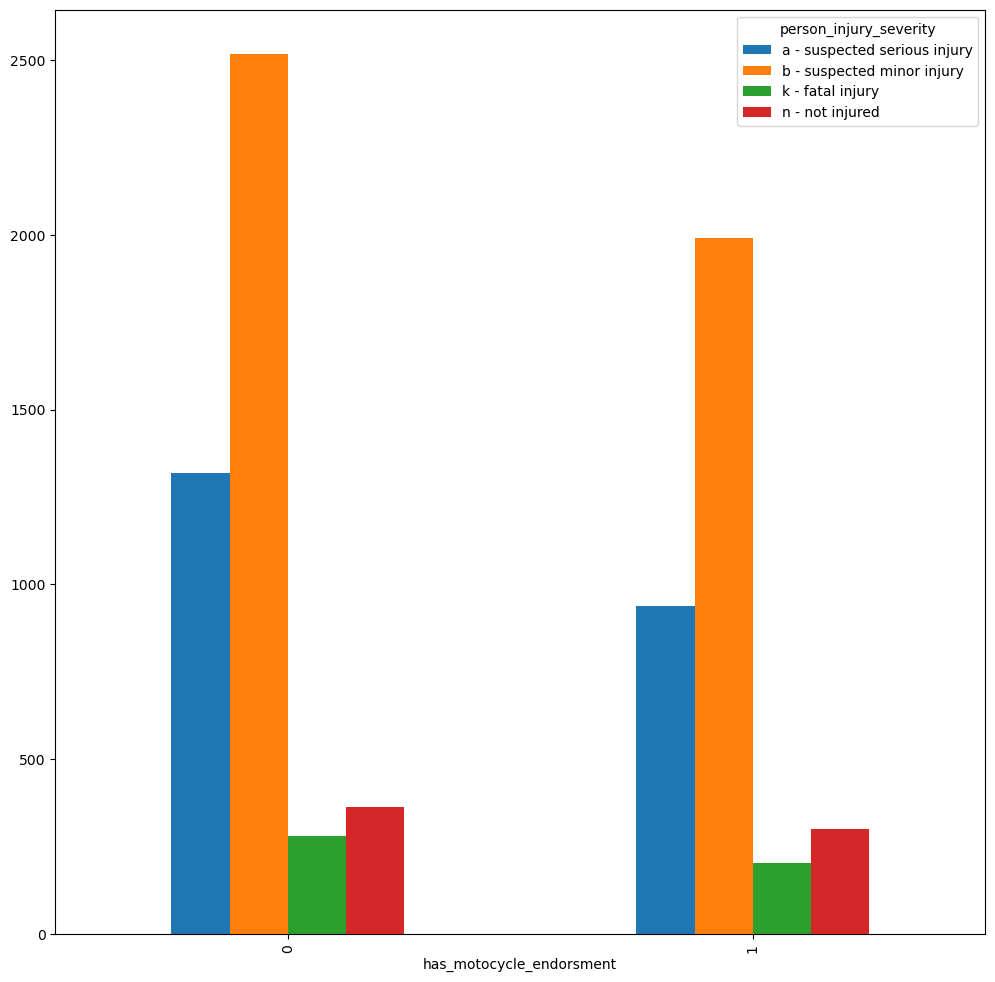

In [13]:
pd.crosstab(train.has_motocycle_endorsment, train.person_injury_severity).plot(kind='bar', figsize=(10,10))
# plt.savefig('ME.png')

## Ethnicity ?

<Axes: xlabel='person_ethnicity'>

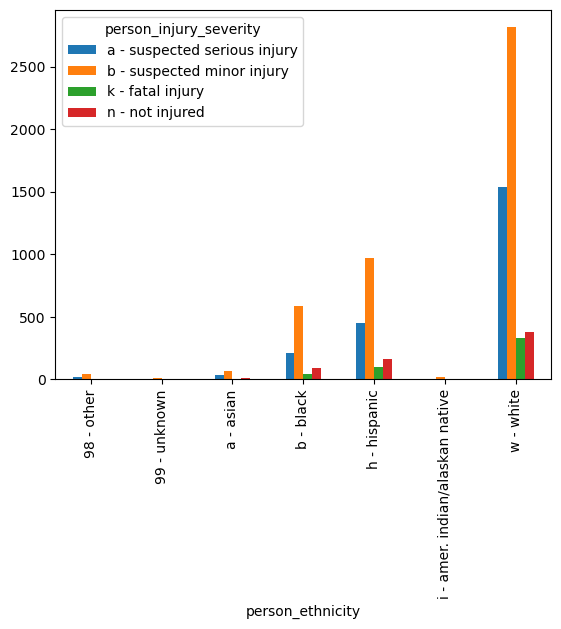

In [14]:
pd.crosstab(train.person_ethnicity, train.person_injury_severity).plot(kind='bar')

In [15]:
train.person_ethnicity.value_counts()

person_ethnicity
w - white                          5065
h - hispanic                       1674
b - black                           929
a - asian                           121
98 - other                           71
i - amer. indian/alaskan native      29
99 - unknown                         25
Name: count, dtype: int64

## Does where the fault of the crash lie matter?-person?-charges

    We will explore this at a later time 

# Has motorcycle endorsment 

<Axes: xlabel='has_motocycle_endorsment'>

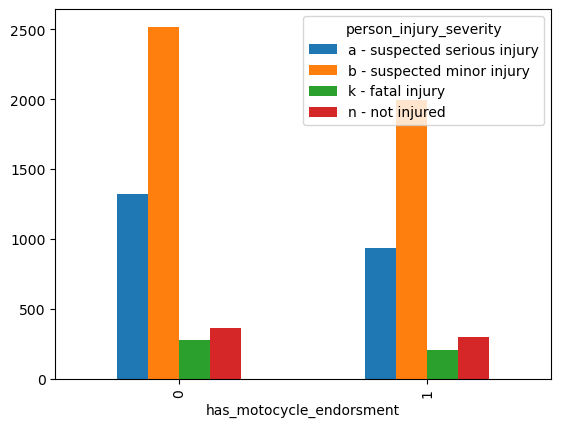

In [16]:
pd.crosstab(train.has_motocycle_endorsment, train.person_injury_severity).plot(kind='bar')

In [17]:
# pd.crosstab(train.person_ethnicity, train.person_helmet).plot(kind='bar')

# visualizations for narrative 

## 1 chart for age bins by crash severity

## 1 chart for ethnicity

<Axes: xlabel='person_ethnicity'>

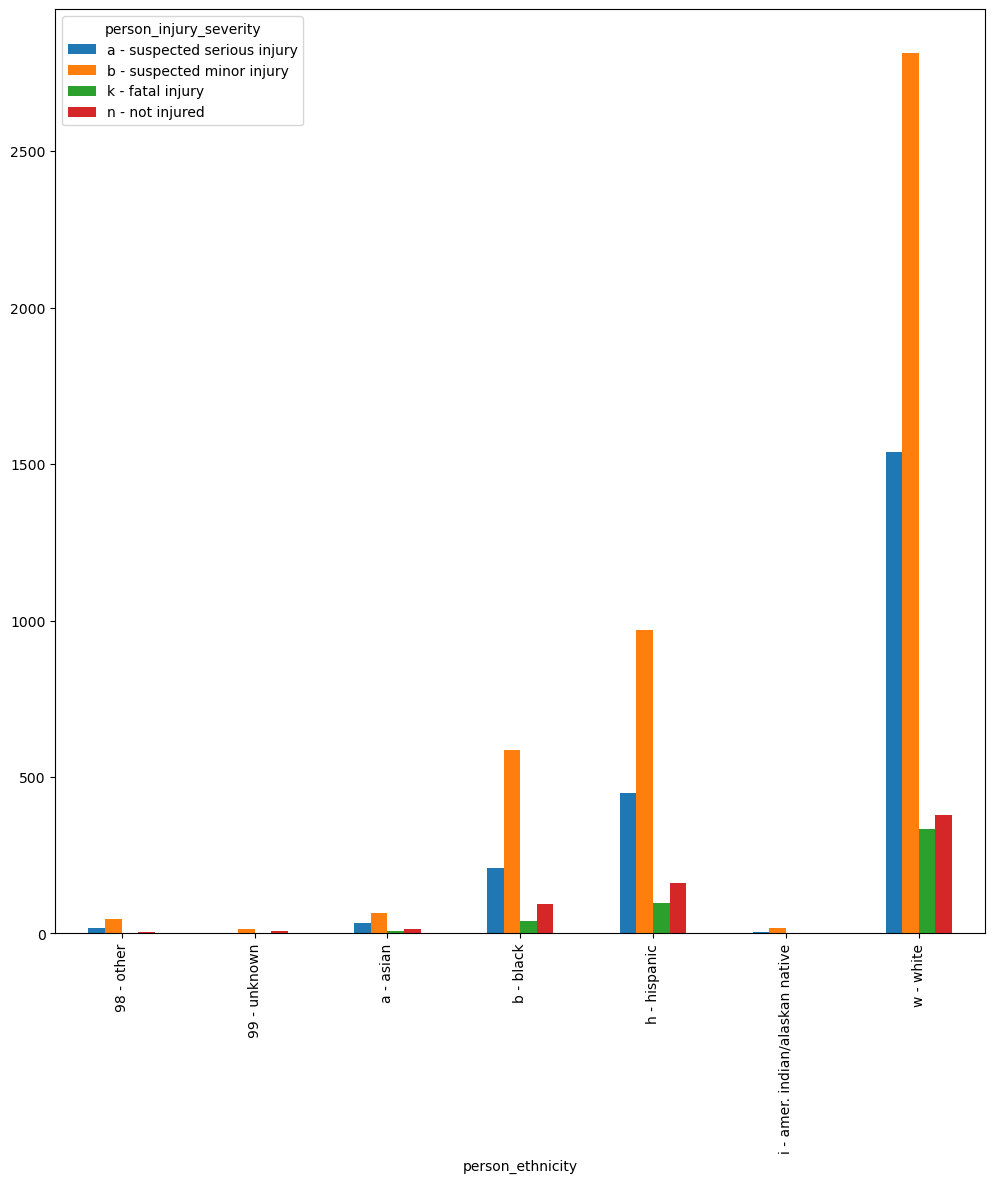

In [18]:
pd.crosstab(train.person_ethnicity, train.person_injury_severity).plot(kind='bar', figsize=(10,10))
# # plt.savefig('person_ethnicity.png')

## 1 chart for gender

## 1 chart for ME by crash severity

    (later well add: 1 clusterings of age bins by person helmet)

<Axes: xlabel='has_motocycle_endorsment'>

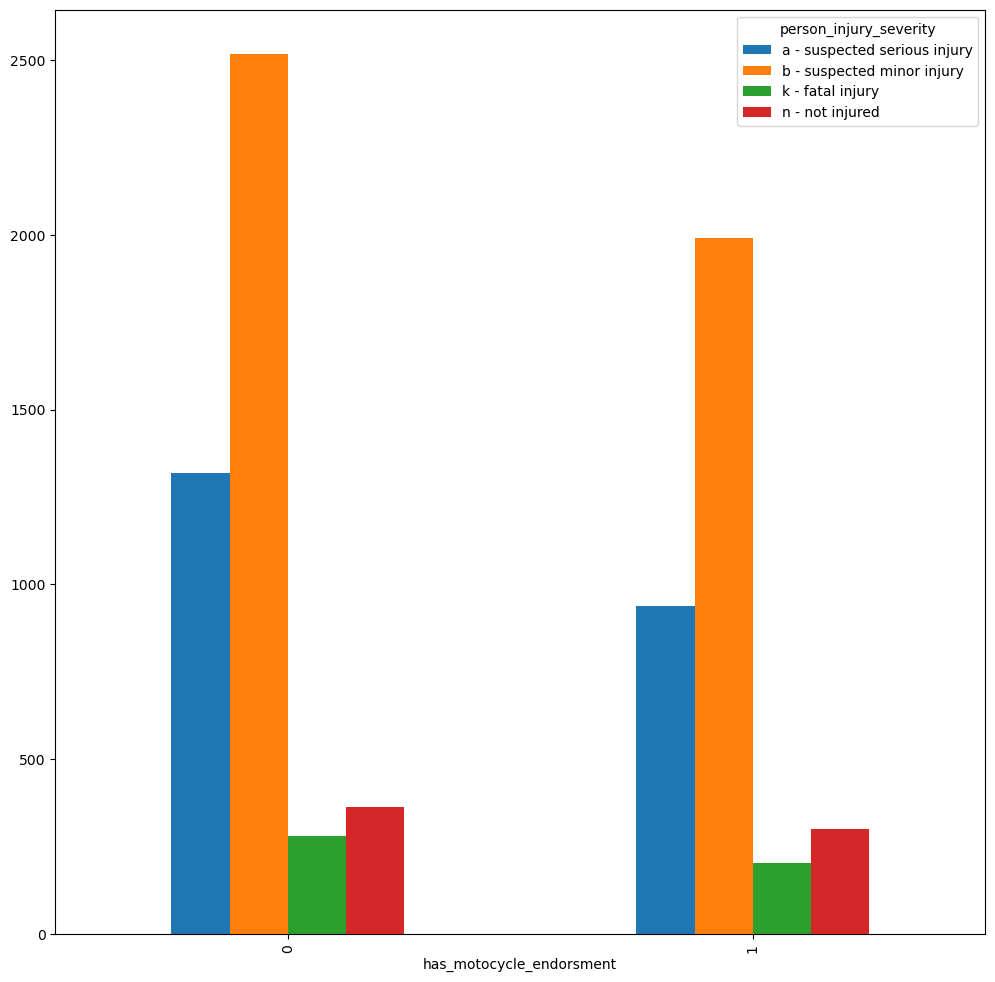

In [19]:
pd.crosstab(train.has_motocycle_endorsment, train.person_injury_severity).plot(kind='bar', figsize= (10,10))

In [20]:
df.head()

,crash_id,person_age,person_ethnicity,person_gender,has_motocycle_endorsment,person_injury_severity,vehicle_body_style,vehicle_color,vehicle_make,vehicle_model,vehicle_model_year,vehicle_make_country,injury_binary
0,16189632,37,w - white,1 - male,0,a - suspected serious injury,mc - motorcycle,blu - blue,harley-davidson,fld,2007,USA,1
1,16203470,30,h - hispanic,1 - male,0,b - suspected minor injury,mc - motorcycle,gry - gray,suzuki,gsx-r600,2004,Japan,1
2,16192023,21,w - white,1 - male,0,a - suspected serious injury,mc - motorcycle,blu - blue,yamaha,yzfr6,2017,Japan,1
3,16196720,18,h - hispanic,1 - male,0,b - suspected minor injury,mc - motorcycle,blu - blue,yamaha,rz500,2002,Japan,1
4,16189103,28,w - white,1 - male,1,b - suspected minor injury,mc - motorcycle,blk - black,harley-davidson,fxdf,2009,USA,1


<Axes: xlabel='has_motocycle_endorsment'>

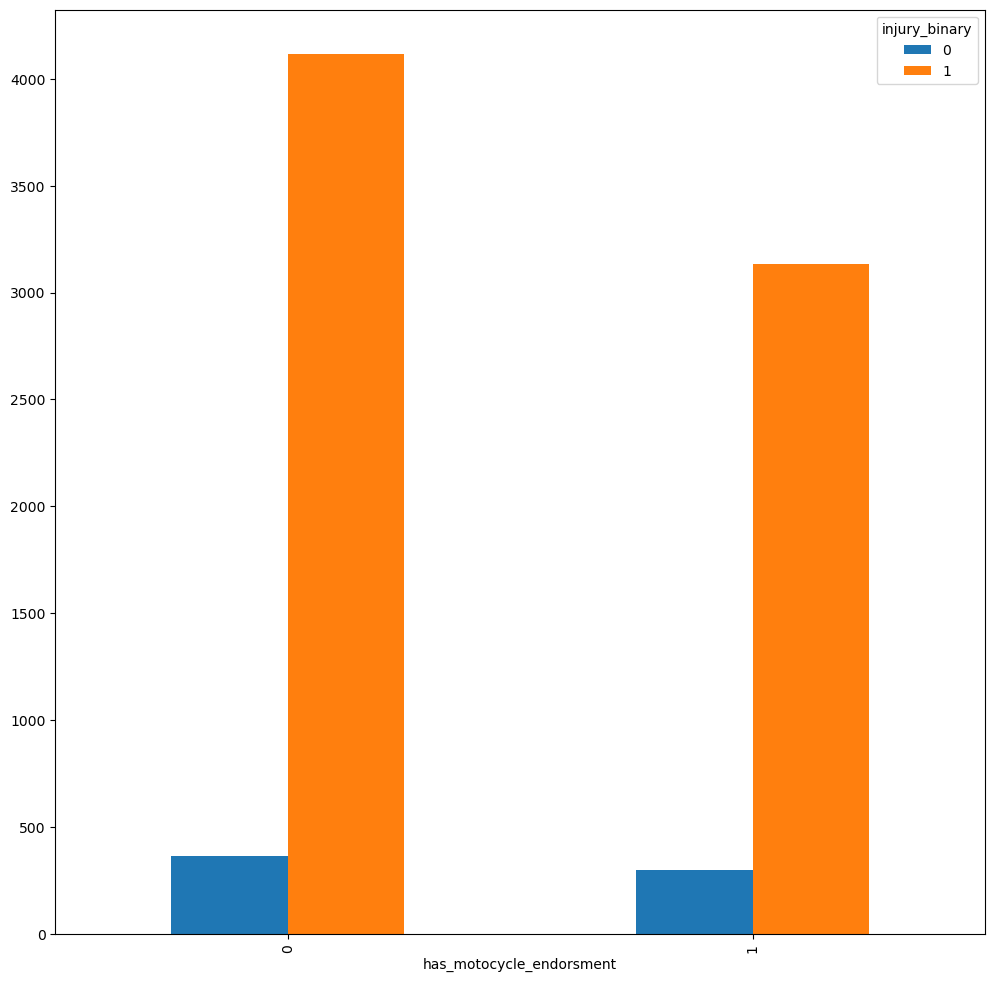

In [21]:
pd.crosstab(train.has_motocycle_endorsment, train.injury_binary).plot(kind='bar', figsize= (10,10))